# Objective

To explore if it is possible to predict stock (local) prices  using technical indicators and historical price data of the stocks

To have an idea of which models perform better in predictions and methods to improve performance!

# Data Download

From yahoofinance, we download the historical daily price data of the 30 component stocks in the STI, in CSV format. We choose dates from 3 Jan 2021 to 30 Apr 2021. The data consists of high, low, open, close and adjusted close. We will use the actual close for most of our analysis.

For easier data organisation later, we save the csv files using the stock/company name organised in 7 alphabets/symbols.


In [1]:
#importing libraries for later use
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Cleaning

We want to loop through the stock price dta csv files in our directory to convert them to data frames, with a check at the end of each loop

We can also use the loop to rename the time column and convert to datetime format 

For data points where volume equals zero, we want to exclude them.

We can then access each data frame by calling data_frames['file[:7]']



In [2]:
import os

directory = "C:/Users/STELLA/Desktop/Data Science/DS105/Project Data/"

data_frames = {}

for file in (os.listdir(directory)):
    df = pd.read_csv(directory+file)
    df.rename(columns = {'Gmt time':'Date'}, inplace = True)
    df['Date'] = pd.to_datetime(df.Date)
    df = df[df.Volume != 0]
    data_frames[file[:7]] = df 
    print(file[:7], "done")

AscendR done
CapitaL done
CapLCom done
CityDev done
Comfort done
DairyFm done
DBSHold done
Genting done
HKGLand done
Jardine done
JMH_USD done
JSH_USD done
KDCReit done
KeppelC done
MapleCT done
MapleIn done
MapleLg done
OCBCBan done
SATSLtd done
SembInd done
SGExchg done
SIA_Ltd done
Singtel done
STEngin done
Thaibev done
UOB_Ltd done
UOL_Ltd done
Venture done
WilmarI done
YZJHold done


In [3]:
len(data_frames)

30

We assign names to the dataframes by company/stock name 


In [4]:
# assigning name to df and checking
ascendr_df = data_frames["AscendR"]
ascendr_df.head(5)

Date      Open      High       Low     Close  Adj Close     Volume
0 2011-01-03  2.032941  2.042715  2.023168  2.042715   1.113942  1310652.0
1 2011-01-04  2.042715  2.072036  2.032941  2.072036   1.129931  4369864.0
2 2011-01-05  2.062263  2.120905  2.062263  2.091584   1.140591  9505042.0
3 2011-01-06  2.101358  2.120905  2.091584  2.120905   1.156581  5138248.0
4 2011-01-07  2.120905  2.130679  2.111131  2.111131   1.151251  4841535.0

In [5]:
capita_df = data_frames["CapitaL"]
caplcom_df = data_frames["CapLCom"]
citydev_df = data_frames["CityDev"]
comfort_df = data_frames["Comfort"]
dairyfm_df = data_frames["DairyFm"]
dbs_df = data_frames["DBSHold"]
genting_df = data_frames["Genting"]
hkgland_df = data_frames["HKGLand"]
jardine_df = data_frames["Jardine"]
jmh_df = data_frames["JMH_USD"]
jms_df = data_frames["JSH_USD"]
kdcreit_df = data_frames["KDCReit"]
keppel_df = data_frames["KeppelC"]
maplect_df = data_frames["MapleCT"]
mapleind_df = data_frames["MapleIn"]
maplelog_df = data_frames["MapleLg"]
ocbc_df = data_frames["OCBCBan"]
sats_df = data_frames["SATSLtd"]
sembind_df = data_frames["SembInd"]
sgx_df = data_frames["SGExchg"]
sia_df = data_frames["SIA_Ltd"]
singtel_df = data_frames["Singtel"]
stengin_df = data_frames["STEngin"]
thaibev_df = data_frames["Thaibev"]
uob_df = data_frames["UOB_Ltd"]
uol_df = data_frames["UOL_Ltd"]
venture_df = data_frames["Venture"]
wilmar_df = data_frames["WilmarI"]
yzj_df = data_frames["YZJHold"]


In [6]:
#Check for null values and drop adjusted close column 
ascendr_df.isnull().sum()
ascendr_df1 = ascendr_df.dropna().drop('Adj Close', axis=1)

capita_df.isnull().sum()
capita_df1 = capita_df.dropna().drop('Adj Close', axis=1)

caplcom_df.isnull().sum()
caplcom_df1 = caplcom_df.dropna().drop('Adj Close', axis=1)

citydev_df.isnull().sum()
citydev_df1 = citydev_df.dropna().drop('Adj Close', axis=1)

comfort_df.isnull().sum()
comfort_df1 = comfort_df.dropna().drop('Adj Close', axis=1)

dairyfm_df.isnull().sum()
dairyfm_df1 = dairyfm_df.dropna().drop('Adj Close', axis=1)

dbs_df.isnull().sum()
dbs_df1 = dbs_df.dropna().drop('Adj Close', axis=1)

genting_df.isnull().sum()
genting_df1 = genting_df.dropna().drop('Adj Close', axis=1)

hkgland_df.isnull().sum()
hkgland_df1 = hkgland_df.dropna().drop('Adj Close', axis=1)

jardine_df.isnull().sum()
jardine_df1 = jardine_df.dropna().drop('Adj Close', axis=1)

jmh_df.isnull().sum()
jmh_df1 = jmh_df.dropna().drop('Adj Close', axis=1)

jms_df.isnull().sum()
jms_df1 = jms_df.dropna().drop('Adj Close', axis=1)

kdcreit_df.isnull().sum()
kdcreit_df1 = kdcreit_df.dropna().drop('Adj Close', axis=1)

keppel_df.isnull().sum()
keppel_df1 = keppel_df.dropna().drop('Adj Close', axis=1)

maplect_df.isnull().sum()
maplect_df1 = maplect_df.dropna().drop('Adj Close', axis=1)

mapleind_df.isnull().sum()
mapleind_df1 = mapleind_df.dropna().drop('Adj Close', axis=1)

maplelog_df.isnull().sum()
maplelog_df1 = maplelog_df.dropna().drop('Adj Close', axis=1)

ocbc_df.isnull().sum()
ocbc_df1 = ocbc_df.dropna().drop('Adj Close', axis=1)

sats_df.isnull().sum()
sats_df1 = sats_df.dropna().drop('Adj Close', axis=1)

sembind_df.isnull().sum()
sembind_df1 = sembind_df.dropna().drop('Adj Close', axis=1)

sgx_df.isnull().sum()
sgx_df1 = sgx_df.dropna().drop('Adj Close', axis=1)

sia_df.isnull().sum()
sia_df1 = sia_df.dropna().drop('Adj Close', axis=1)

singtel_df.isnull().sum()
singtel_df1 = singtel_df.dropna().drop('Adj Close', axis=1)

stengin_df.isnull().sum()
stengin_df1 = stengin_df.dropna().drop('Adj Close', axis=1)

thaibev_df.isnull().sum()
thaibev_df1 = thaibev_df.dropna().drop('Adj Close', axis=1)

uob_df.isnull().sum()
uob_df1 = uob_df.dropna().drop('Adj Close', axis=1)

uol_df.isnull().sum()
uol_df1 = uol_df.dropna().drop('Adj Close', axis=1)

venture_df.isnull().sum()
venture_df1 = venture_df.dropna().drop('Adj Close', axis=1)

wilmar_df.isnull().sum()
wilmar_df1 = wilmar_df.dropna().drop('Adj Close', axis=1)

yzj_df.isnull().sum()
yzj_df1 = yzj_df.dropna().drop('Adj Close', axis=1)

# Some EDA 

Just a slight digression here, as I want to check the correlation of all the stocks to understand the data set we have better. I will just download price data of all the tickers using a loop so I dont have to go trhough merging of the data frames created preciously and check the correlations

In [7]:
from yahoofinancials import YahooFinancials as yf
from pandas_datareader import data as pdr

startD = '2011-01-03'
endD = '2021-04-30'

# DBS, Venture, Singtel,Thaibev,STEngin, MapleCT, Hkgland, Wilmar,Jardine Matheson,
#Jardine C&C, CapitaIntCom, MapleLog, Genting, YZJ, DairyFm, CityDev, SembInd, Ascendas, Keppel,
#OCBC, SGX, Capita, Sats, UOL, Comfort, UOB, SIA, SPH, KDCReit
stocks = ['D05.SI','V03.SI','Z74.SI','Y92.SI', 'S63.SI','N2IU.SI','H78.SI','F34.SI','J36.SI',
         'C07.SI','C38U.SI','M44U.SI','G13.SI','BS6.SI','D01.SI','C09.SI','U96.SI','A17U.SI', 'BN4.SI',
          'O39.SI','S68.SI','C31.SI','S58.SI','U14.SI','C52.SI','U11.SI','C6L.SI','T39.SI','AJBU.SI']
start_date = pd.to_datetime(startD) 
end_date = pd.to_datetime(endD)
data = pdr.get_data_yahoo(stocks, start=start_date, end=end_date)

def download_price(stocks):
    data = pdr.get_data_yahoo(stocks, start=start_date, end=end_date)['Close']
    return data 

df = download_price(stocks)
df1 = df.dropna()
df1.head(10)

Symbols        D05.SI  V03.SI  Z74.SI  Y92.SI  S63.SI   N2IU.SI  H78.SI  \
Date                                                                      
2014-12-12  20.100000    7.72    3.99   0.705    3.39  1.427403    6.80   
2014-12-15  19.780001    7.71    3.97   0.690    3.35  1.442119    6.83   
2014-12-16  19.170000    7.69    3.86   0.685    3.23  1.442119    6.79   
2014-12-17  19.080000    7.65    3.91   0.695    3.22  1.432308    6.81   
2014-12-18  19.530001    7.65    3.87   0.680    3.27  1.412688    6.74   
2014-12-19  19.930000    7.56    3.82   0.680    3.30  1.397972    6.76   
2014-12-22  20.080000    7.62    3.89   0.700    3.34  1.402877    6.88   
2014-12-23  20.080000    7.70    3.91   0.695    3.34  1.393067    6.74   
2014-12-24  20.200001    7.73    3.92   0.705    3.37  1.412688    6.74   
2014-12-26  20.350000    7.72    3.93   0.700    3.41  1.407783    6.75   

Symbols     F34.SI     J36.SI     C07.SI  ...  O39.SI  S68.SI  C31.SI  S58.SI  \
Date                                      ...                                   
2014-12-12    3.24  58.150002  41.093426  ...   10.46    7.70    3.29    2.85   
2014-12-15    3.23  57.799999  40.325050  ...   10.43    7.58    3.24    2.86   
2014-12-16    3.13  57.639999  38.846661  ...   10.10    7.39    3.14    2.86   
2014-12-17    3.11  57.509998  38.788303  ...   10.08    7.54    3.10    2.88   
2014-12-18    3.13  58.299999  38.992554  ...   10.10    7.57    3.08    2.87   
2014-12-19    3.17  59.000000  40.500126  ...   10.26    7.73    3.17    2.86   
2014-12-22    3.23  59.709999  40.704376  ...   10.41    7.82    3.23    2.92   
2014-12-23    3.21  60.049999  40.889175  ...   10.41    7.79    3.23    2.91   
2014-12-24    3.22  60.000000  40.937805  ...   10.45    7.82    3.24    2.95   
2014-12-26    3.23  60.189999  41.083698  ...   10.46    7.83    3.27    2.97   

Symbols     U14.SI  C52.SI     U11.SI  C6L.SI  T39.SI   AJBU.SI  
Date                                                             
2014-12-12    6.74    2.60  24.350000   11.63    4.19  0.932127  
2014-12-15    6.67    2.56  24.090000   11.58    4.16  0.932127  
2014-12-16    6.52    2.50  23.250000   11.59    4.11  0.922468  
2014-12-17    6.53    2.51  23.379999   11.31    4.10  0.932127  
2014-12-18    6.55    2.47  23.450001   11.49    4.11  0.932127  
2014-12-19    6.73    2.49  23.750000   11.50    4.14  0.927298  
2014-12-22    6.84    2.56  24.180000   11.64    4.20  0.927298  
2014-12-23    6.90    2.56  24.480000   11.63    4.20  0.927298  
2014-12-24    6.93    2.59  24.360001   11.67    4.21  0.932127  
2014-12-26    7.00    2.61  24.480000   11.67    4.21  0.932127  

[10 rows x 29 columns]

In [8]:
corr_df1 = df1.corr(method='pearson')
corr_df1.head(10)

Symbols    D05.SI    V03.SI    Z74.SI    Y92.SI    S63.SI   N2IU.SI    H78.SI  \
Symbols                                                                         
D05.SI   1.000000  0.811334 -0.472569 -0.015207  0.651694  0.600623 -0.067493   
V03.SI   0.811334  1.000000 -0.649670 -0.021193  0.411174  0.522170 -0.320260   
Z74.SI  -0.472569 -0.649670  1.000000  0.486551 -0.299979 -0.646759  0.803459   
Y92.SI  -0.015207 -0.021193  0.486551  1.000000  0.236707  0.009859  0.379315   
S63.SI   0.651694  0.411174 -0.299979  0.236707  1.000000  0.778256 -0.144366   
N2IU.SI  0.600623  0.522170 -0.646759  0.009859  0.778256  1.000000 -0.606434   
H78.SI  -0.067493 -0.320260  0.803459  0.379315 -0.144366 -0.606434  1.000000   
F34.SI   0.366973  0.390426 -0.642744 -0.088483  0.538882  0.703435 -0.655983   
J36.SI   0.327536  0.087570  0.389254  0.451506  0.296284 -0.149453  0.681934   
C07.SI  -0.277269 -0.391662  0.824547  0.594589 -0.120570 -0.543268  0.815381   

Symbols    F34.SI    J36.SI    C07.SI  ...    O39.SI    S68.SI    C31.SI  \
Symbols                                ...                                 
D05.SI   0.366973  0.327536 -0.277269  ...  0.870901  0.306561  0.522471   
V03.SI   0.390426  0.087570 -0.391662  ...  0.666802  0.300437  0.263772   
Z74.SI  -0.642744  0.389254  0.824547  ... -0.067973 -0.557425  0.311625   
Y92.SI  -0.088483  0.451506  0.594589  ...  0.202423 -0.201897  0.543937   
S63.SI   0.538882  0.296284 -0.120570  ...  0.486517  0.426632  0.577781   
N2IU.SI  0.703435 -0.149453 -0.543268  ...  0.258132  0.670396  0.231322   
H78.SI  -0.655983  0.681934  0.815381  ...  0.340204 -0.651208  0.498913   
F34.SI   1.000000 -0.233008 -0.565555  ...  0.029120  0.794196  0.026241   
J36.SI  -0.233008  1.000000  0.676685  ...  0.618108 -0.341474  0.669144   
C07.SI  -0.565555  0.676685  1.000000  ...  0.149335 -0.671326  0.452515   

Symbols    S58.SI    U14.SI    C52.SI    U11.SI    C6L.SI    T39.SI   AJBU.SI  
Symbols                                                                        
D05.SI   0.424472  0.733411 -0.441361  0.920422 -0.204665 -0.591595  0.415781  
V03.SI   0.345344  0.659584 -0.732639  0.650257 -0.422811 -0.765733  0.580153  
Z74.SI   0.147761 -0.098845  0.843996 -0.149344  0.871567  0.925889 -0.876757  
Y92.SI   0.600710  0.264583  0.250010  0.135082  0.395820  0.246597 -0.286004  
S63.SI   0.329398  0.494890 -0.228916  0.593555 -0.247209 -0.483742  0.442976  
N2IU.SI  0.076314  0.388416 -0.545748  0.404434 -0.616576 -0.786694  0.789973  
H78.SI   0.396597  0.136722  0.723277  0.252799  0.887648  0.760011 -0.858539  
F34.SI  -0.158507  0.214862 -0.596747  0.102327 -0.739639 -0.678653  0.834308  
J36.SI   0.641781  0.330803  0.297426  0.548966  0.580116  0.302576 -0.468587  
C07.SI   0.469218  0.009270  0.655034  0.056298  0.846554  0.746518 -0.820791  

[10 rows x 29 columns]

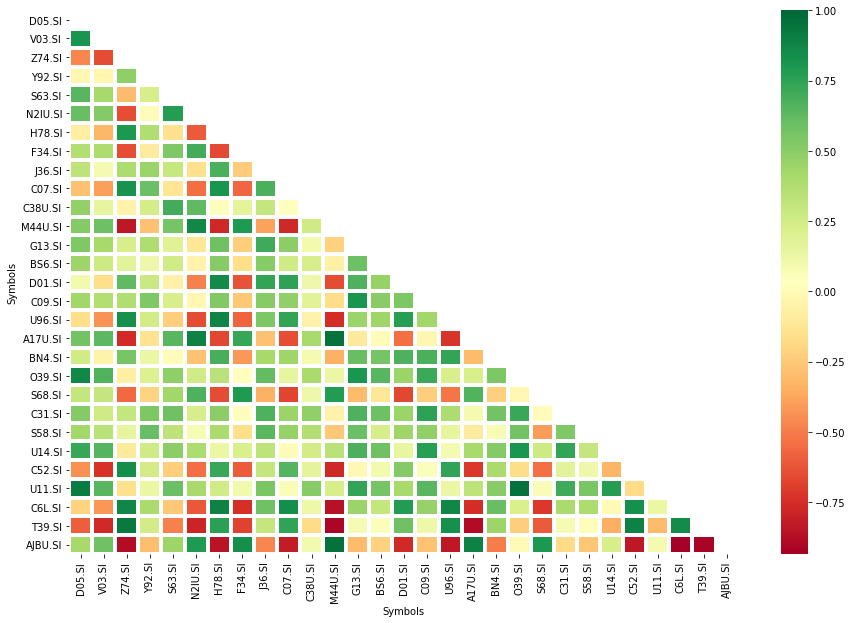

In [9]:
# just want to see half the chartsince it is symmetrical
mask = np.zeros_like(corr_df1)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(15,10))
sns.heatmap(df1.corr(),cmap='RdYlGn', mask=mask, linewidths= 3);

We notice that some interesting positive correlations exist especially among stocks in the same sectors for example between 
DBS and OCBC or UOB.
Some correlations do not make sense at all, for example Dairy Farm in the consumer sector is strongly negatively correlated with Keppel DC Reit which has data centres in its portfolios

Thus I think its is quite challenging to use correlations as one of our features in this study and will put it aside first, to consider later. 

Financials - UOB, SGX, OCBC, DBS

Industrials - ST Engineering, SIA, SATS, Comfort, Keppel, Sembcorp Industrial, Jardine JMH, Jardine JMS, YZJ

Real Estate - Capitaland, UOL, Ascendas Reit, City Development, HKLand, Capita Integrated Comm, Keppel DC Reit, Frasers, Mapletree Comm, Mapletree Log, Mapletree Ind

Consumer - Dairy Farm, Jardine , Genting, Wilmar

IT/Communications - Singtel, Venture

# Feature Engineering
We would like to incorporate some technical indicators as features into our models. We will use talib for this. The features are:  simple moving average, exponential moving average, average direction movement index, average true range, standard deviation, WIlliams%R and relative strength index. 

First we want to add in a few features that are open-close% change, high-low% change and volume % change.

In [10]:
stocks = [ascendr_df1, capita_df1,caplcom_df1, citydev_df1, comfort_df1, dairyfm_df1, dbs_df1, genting_df1, hkgland_df1,
          jardine_df1, jmh_df1, jms_df1, kdcreit_df1, keppel_df1, maplect_df1, mapleind_df1, maplelog_df1, ocbc_df1, 
          sats_df1, sembind_df1, sgx_df1, sia_df1, singtel_df1, stengin_df1, thaibev_df1, uob_df1, uol_df1,venture_df1,
          wilmar_df1, yzj_df1 ]
j = 0

for i in stocks:
    j+=1
    i['Open-Close'] = (i.Open - i.Close).pct_change()
    i['High-Low'] = (i.High - i.Low).pct_change()
    i['Volume Gap'] = i.Volume.pct_change()
    print('done',j)


done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30




# Simple Moving Average and Exponential Moving Average 
A simple moving average (SMA) calculates the average of a range of closing prices, by the number of periods in that range.
It can be used to determine if an asset price will continue or if it will reverse a bull or bear trend.

An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points.

# Average Directional Movement Index (Momentum Indicator)
ADX can be used to help measure the overall strength of a trend and is an average of expanding price range values.

In [11]:
import talib as ta
from talib import RSI, BBANDS

In [12]:
a = 0 
for i in stocks:
    a+=1
    i['SMA20'] = ta.SMA(i['Close'],20)
    i['SMA50'] = ta.SMA(i['Close'],50)
    i['SMA100'] = ta.SMA(i['Close'],100)
    i['EMA20'] = ta.EMA(i['Close'],20)
    i['EMA50'] = ta.EMA(i['Close'],50)
    i['EMA100'] = ta.EMA(i['Close'],100)
    i['ADX'] = ta.ADX(i['High'],i['Low'], i['Close'], timeperiod=20)
    print('done', a)


done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30


# Standard Deviation (SD), Average True Range(ATR), Relative Strength Index (RSI), and Williams%R (WILLR)

Standard deviation  measures the dispersion of a dataset relative to its mean. It is calculated as the square root of variance by determining each data point's deviation relative to the mean. If the data points are further from the mean, there is a higher deviation within the data set.

Average true range (ATR) is a volatility indicator that shows how much an asset moves, on average, during a given time frame. While the ATR doesn't tell us in which direction the trade will breakout, it can be added to the closing price, and the trader can buy whenever the next day's price trades above that value.

The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes. The RSI is displayed as an oscillator, uses 14 periods in calculation and can have a reading from 0 to 100. It signals overnought or oversold price momentum.An asset is usually considered overbought when the RSI is above 70% and oversold when it is below 30%.

Williams %R, also known as the Williams Percent Range, is a type of momentum indicator that moves between 0 and -100 and measures overbought and oversold levels. The Williams %R may be used to find entry and exit points in the market. 


In [13]:
b = 0
for i in stocks:
    b+=1
    i['SD'] = i['Close'].rolling(20).std()
    i['ATR'] = ta.ATR(i['High'], i['Low'], i['Close'], timeperiod=14)
    i['RSI'] = ta.RSI(i['Close'],14)
    i['WILLR'] = ta.WILLR(i['High'], i['Low'], i['Close'], timeperiod=14)
    print('done', b)

done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30


In [14]:
#check a sample df

wilmar_df1.head(5)

Date  Open  High   Low  Close      Volume  Open-Close  High-Low  \
0 2011-01-03  5.65  5.68  5.64   5.66   9859000.0         NaN       NaN   
1 2011-01-04  5.66  5.67  5.44   5.50  36415000.0  -17.000000  4.750000   
2 2011-01-05  5.53  5.62  5.50   5.56  19909000.0   -1.187500 -0.478261   
3 2011-01-06  5.59  5.68  5.59   5.64  17239000.0    0.666667 -0.250000   
4 2011-01-07  5.68  5.74  5.66   5.70  15191000.0   -0.600000 -0.111111   

   Volume Gap  SMA20  SMA50  SMA100  EMA20  EMA50  EMA100  ADX  SD  ATR  RSI  \
0         NaN    NaN    NaN     NaN    NaN    NaN     NaN  NaN NaN  NaN  NaN   
1    2.693579    NaN    NaN     NaN    NaN    NaN     NaN  NaN NaN  NaN  NaN   
2   -0.453275    NaN    NaN     NaN    NaN    NaN     NaN  NaN NaN  NaN  NaN   
3   -0.134110    NaN    NaN     NaN    NaN    NaN     NaN  NaN NaN  NaN  NaN   
4   -0.118800    NaN    NaN     NaN    NaN    NaN     NaN  NaN NaN  NaN  NaN   

   WILLR  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN

# Prediction of Stock Prices

We will use supervised learning and consider to use a regression model to predict stock prices. We will first run an initial analysis using Multivariate Regression, Support Vector Regression, XG Boost, Random Forest Regression, Decision Tree Regression and evaluate them using RMSE and MAE.

Obviously we have the whole set of 30 stocks which is too much for the scope of this project. I will select 1 stock  and apply machine learning prediction on it. 

For future use, as the data is already downloaded, one can just easily substitute the stock name in the code below as stock1. 

# MULTIVARIATE REGRESSION

### Choose the stock ticker

In [15]:
#drop infinity and nan values

stock1 = comfort_df1

stock_drop_inf = stock1.replace([np.inf, -np.inf], np.nan)

stock = stock_drop_inf.dropna(axis=0)


### Visualise the dataset

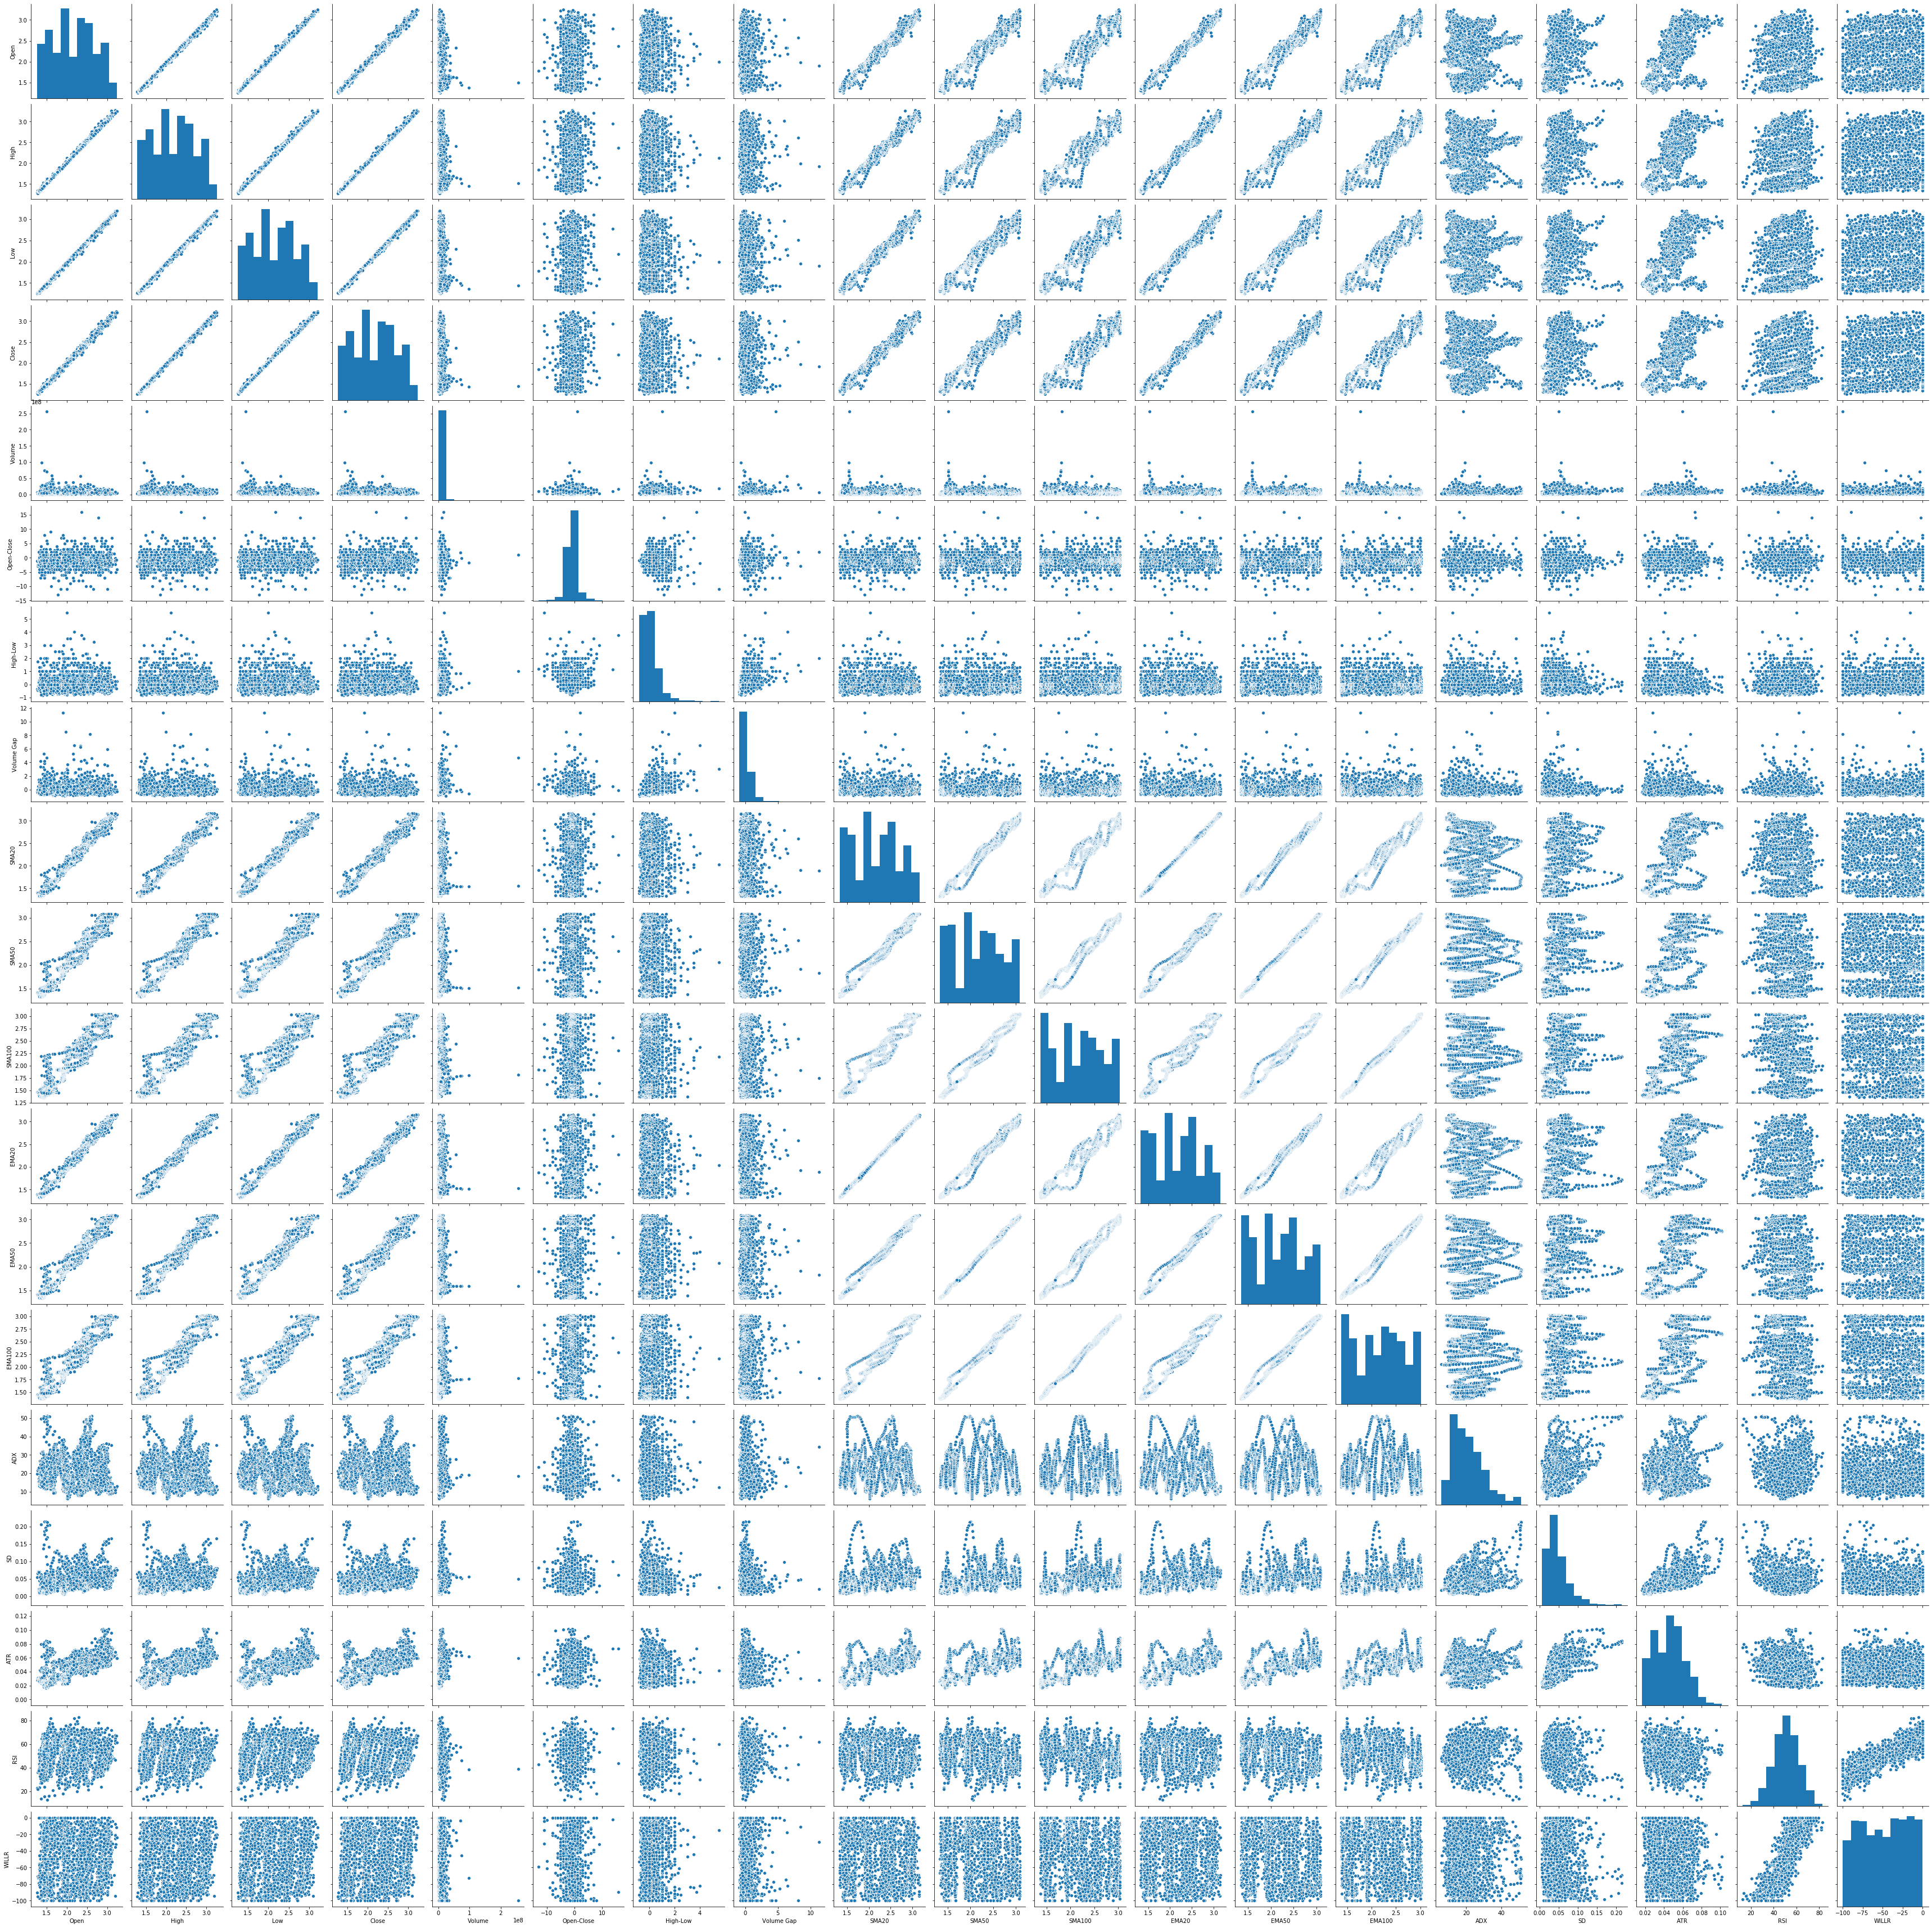

In [16]:
sns.pairplot(stock)

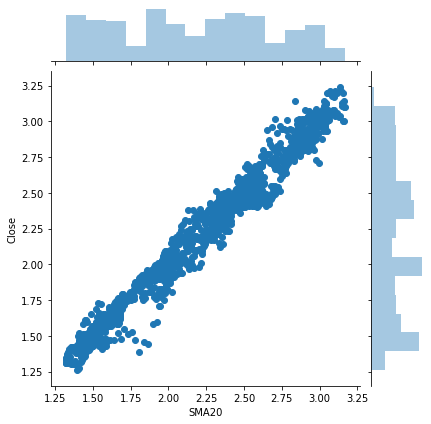

In [17]:
# closer example of plot
sns.jointplot( x = 'SMA20', y = 'Close', data = stock)

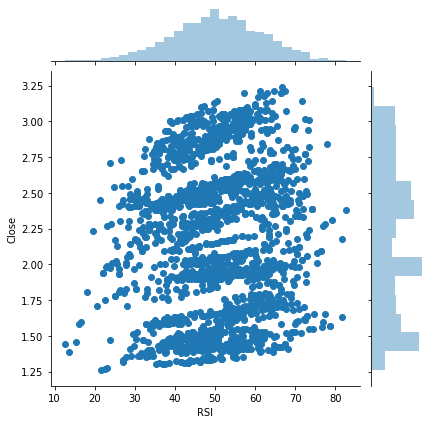

In [18]:
# closer example of plot
sns.jointplot( x = 'RSI', y = 'Close', data = stock)

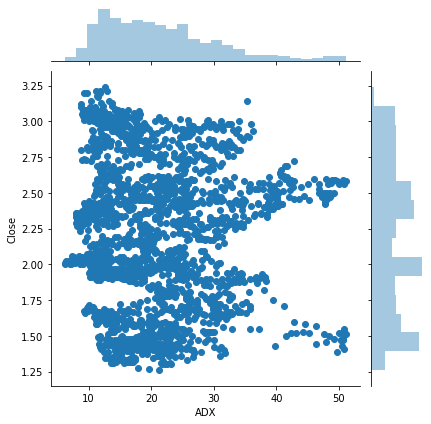

In [19]:
# closer example of plot
sns.jointplot( x = 'ADX', y = 'Close', data = stock)

In [20]:
#Identify X and y

import sklearn

# create feature & response variables
feature_columns = ['SMA20', 'SMA50', 'SMA100', 'EMA20',\
                   'EMA50', 'EMA100', 'ADX',\
                   'SD', 'ATR', 'RSI','WILLR']

X = stock[feature_columns]
y = stock['Close']

In [21]:
X.head()

SMA20   SMA50  SMA100     EMA20     EMA50    EMA100        ADX  \
99   1.4775  1.5148  1.5444  1.476176  1.508314  1.544400  21.192482   
100  1.4720  1.5134  1.5431  1.472730  1.505635  1.542333  21.684812   
102  1.4670  1.5124  1.5411  1.473187  1.503287  1.539694  20.455641   
103  1.4660  1.5116  1.5397  1.471932  1.501590  1.538116  20.151753   
105  1.4625  1.5088  1.5363  1.466048  1.496838  1.534265  20.509082   

           SD       ATR        RSI       WILLR  
99   0.029890  0.024113  37.275283  -83.333333  
100  0.025670  0.023105  37.275283  -83.333333  
102  0.018382  0.023289  49.628929  -16.666667  
103  0.018180  0.023054  44.628207  -50.000000  
105  0.019702  0.023348  38.107387 -100.000000

In [22]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
# Scale the X data first 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [24]:
X_train.shape

(1665, 11)

In [25]:
X_test.shape

(417, 11)

In [26]:
# TRAIN THE MODEL

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

model_LR =regressor.fit(X_train, y_train)


In [27]:
print('Linear Model Coeff (m)', regressor.coef_)
print('Linear Model Coeff (b)', regressor.intercept_)

Linear Model Coeff (m) [-0.33659228  0.03740791  0.01702788  1.04388067 -0.33286488  0.07901603
 -0.00217031 -0.00141893  0.00196058  0.03843979  0.00923198]
Linear Model Coeff (b) 2.1748348348348348


Text(0.5, 1.0, 'Multiple Linear Regression Predictions')

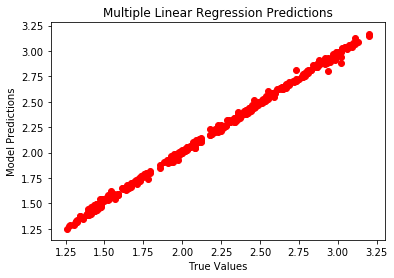

In [28]:
# Visualise the model

y_predict = regressor.predict(X_test)

# Plot of predicted y values (Y axis) against actual y values (X axis) 

plt.scatter(y_test, y_predict, color = 'r')

plt.ylabel('Model Predictions')
plt.xlabel('True Values')
plt.title('Multiple Linear Regression Predictions')

### Metrics

In [29]:
# Evaluate the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1] # store no. of features as k ie. k=11
n = len(X_test) # store no. of rows as n

In [30]:
# Reminder: Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
# R2 assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))

MAE = mean_absolute_error(y_test, y_predict)

r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   # no inbuilt function for r2 adjusted so need to code the formula out

print('Linear Regression','\nRMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


Linear Regression 
RMSE = 0.025 
MAE = 0.01849514457805741 
R2 = 0.9977604061032178 
Adjusted R2 = 0.9976995776270089


### Residuals Plot

A residual plot is typically used to find problems with regression. 

Heteroscedastic data - points at widely varying distances from the line and typically a cone like shape.

Data that is non-linearly associated. 

Data sets with outliers.

These problems are more easily seen with a residual plot than by looking at a plot of the original data set. Ideally, residual values should be equally and randomly spaced around the horizontal axis.

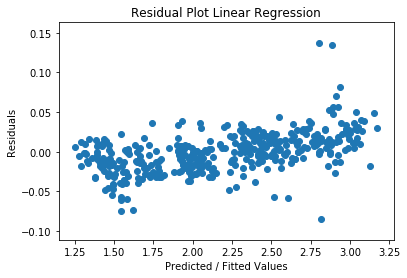

In [31]:
# LEts have a look at the residuals plot
import matplotlib.pyplot as plt
residuals = y_test - y_predict
plt.scatter(y_predict, residuals)

plt.ylabel('Residuals')
plt.xlabel('Predicted / Fitted Values')
plt.title('Residual Plot Linear Regression')
plt.show()

Since the residuals appear to be randomly scattered around zero, this is an indication that heteroscedasticity is not a problem with the predictor variable.

Looking at the RMSE, MAE and R2 numbers, the model performance seems to be good but the R2 value could be too good to be true? We will check more in the next section if we have a case of overfitting

### Regression Cofficients 

In [32]:
coeff_df = pd.DataFrame(data = regressor.coef_, index= X.columns, columns = ['Coefficient'])

coeff_df

Coefficient
SMA20     -0.336592
SMA50      0.037408
SMA100     0.017028
EMA20      1.043881
EMA50     -0.332865
EMA100     0.079016
ADX       -0.002170
SD        -0.001419
ATR        0.001961
RSI        0.038440
WILLR      0.009232

### Predicted Values vs True Values

In [33]:
test= pd.DataFrame(y_test)
predict_lr = pd.DataFrame(y_predict)
print('Real Values LR', test.head(10))

print('Predicted Values LR', predict_lr.head(10))

Real Values LR       Close
1733   2.00
1823   2.10
2294   1.99
1699   2.03
2575   1.76
1751   1.96
766    1.93
2315   1.47
1936   2.36
2217   2.34
Predicted Values LR           0
0  2.015685
1  2.123844
2  1.996346
3  2.045591
4  1.778886
5  1.951858
6  1.923157
7  1.545384
8  2.362406
9  2.314915


# LIMITATIONS OF LINEAR REGRESSION , OVERFITTING AND REGULARISATION

The objective of ordinary least square(OLS) regression is to find the best fit line that minimizes the sum of squared errors (SSE) between the observed and predicted response. While the linear regression model is simple to use and commonly used,  there are limitations that the classical linear regression model doesn’t handle well:

A) Multicollinearity  - refers to the extent independent variables (predictors or features) in a
regression model are correlated to each other.

Multicollinearity can result in several problems, including the following:

i.The partial regression coefficients may not be estimated precisely. The standard errors are
likely to be high.

ii.It becomes unreliable when assessing the relative importance of the independent variables
in explaining the variation in the dependent variable.

iii.Highly correlated variables will cause ‘double effect’ on the model which does not reflect
reality.

B) When the number of independent variables is larger than the number of observations. When this happens, the OLS estimates are not valid mainly because there are infinite solutions to our estimators.


## Multicollinearity

In [34]:
# We can detect multicollinearity using VIF dataframe. VIF of 1 is ideal 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

   feature            VIF
0    SMA20   54938.839523
1    SMA50  111805.152187
2   SMA100   29256.326260
3    EMA20   83921.683466
4    EMA50  839651.839069
5   EMA100   16827.768862
6      ADX       8.436040
7       SD       7.978888
8      ATR      34.308740
9      RSI      21.442272
10   WILLR       5.730728


The high levels of VIF for the SMA and EMA seem alarming. However by logic, it does make sense that some of the technical indicators are highly correlated with each other. 

Just for curiousity sake, lets try to use only one type of SMA or one type of EMA and check again. 

Linear Model Coeff (m) [ 0.52166362  0.00121929 -0.00575999 -0.00323288  0.11794408 -0.03315018]
Linear Model Coeff (b) 2.1768078078078084


Text(0.5, 1.0, 'Multiple Linear Regression Predictions')

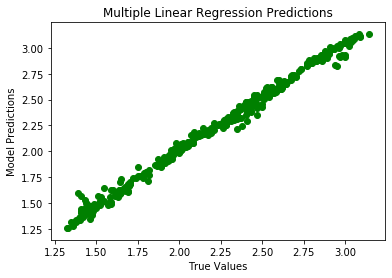

In [35]:
#Lets try to drop the many moving averages which are correlated with each other, and just include EMA50
feature_columns_drop = ['EMA50', 'ADX',\
                   'SD', 'ATR', 'RSI','WILLR']

X_drop = stock[feature_columns_drop]
y_drop = stock['Close']

# Train test split
from sklearn.model_selection import train_test_split

X_drop_train, X_drop_test, y_drop_train, y_drop_test = train_test_split(X_drop, y_drop, test_size = 0.2)

# Scale the X data first 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_drop_train = sc.fit_transform(X_drop_train)
X_drop_test = sc.fit_transform(X_drop_test)

#Train the model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_drop_train, y_drop_train)

print('Linear Model Coeff (m)', regressor.coef_)
print('Linear Model Coeff (b)', regressor.intercept_)

# Visualise the model

y_drop_predict = regressor.predict(X_drop_test)

# Plot of predicted y values (Y axis) against actual y values (X axis) 

plt.scatter(y_drop_test, y_drop_predict, color = 'g')

plt.ylabel('Model Predictions')
plt.xlabel('True Values')
plt.title('Multiple Linear Regression Predictions')

### Residuals Plot and Metrics

In [36]:

RMSE = float(format(np.sqrt(mean_squared_error(y_drop_test, y_drop_predict)) , '.3f'))

MAE = mean_absolute_error(y_drop_test, y_drop_predict)

r2 = r2_score(y_drop_test, y_drop_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)  

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.048 
MAE = 0.03795670307966796 
R2 = 0.990639615118806 
Adjusted R2 = 0.9903853824430205


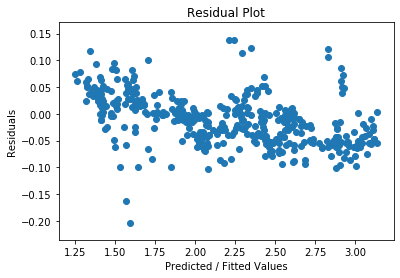

In [37]:
# Lets have a look at the residuals plot

import matplotlib.pyplot as plt
residuals = y_drop_test - y_drop_predict
plt.scatter(y_drop_predict, residuals)

plt.ylabel('Residuals')
plt.xlabel('Predicted / Fitted Values')
plt.title('Residual Plot')
plt.show()

In [38]:
# We can detect multicollinearity using VIF dataframe. VIF of 1 is ideal 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_drop.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_drop.values, i)
                          for i in range(len(X_drop.columns))]
  
print(vif_data)

  feature        VIF
0   EMA50  37.782414
1     ADX   7.917185
2      SD   7.581525
3     ATR  30.037239
4     RSI  14.438831
5   WILLR   4.158826


### Predicted Values vs True Values

In [39]:
test= pd.DataFrame(y_drop_test)
predict = pd.DataFrame(y_drop_predict)
print('Real Values LR1', test.head(10))

print('Predicted Values LR1', predict.head(10))

Real Values LR1       Close
196   1.345
1208  3.030
1028  2.950
2001  2.120
610   1.820
1393  2.820
1143  3.050
137   1.430
692   1.910
422   1.680
Predicted Values LR1           0
0  1.321249
1  3.085288
2  2.828850
3  2.151209
4  1.819843
5  2.869096
6  3.087209
7  1.419554
8  1.918096
9  1.630477


This does look like a slightly better model now, given the improved VIF numbers. The metrics MAE and RSME became slightly worse, indicating that some of the removed features might have been useful.

We will explore other techniques to address overfitting in the next section. 

# OVERFITTING AND REGULARISATION

Overfitting is a modeling error that occurs when a function or model is too closely fitting the training set. Overfitting the model generally takes the form of making an overly complex model to explain model behavior in the data under study.

Regularization helps to address overfitting by shrinking the coefficient estimates towards zero. 

#### Approaches to regularize ordinary linear regression models:

#### 1.Ridge Regression

#### 2.Lasso Regression

#### 3.Elastic Net Regression

In [40]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet 
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn import metrics

In [41]:
#LASSO Model

model_Lasso = Lasso(alpha= 0.7 )
model_Lasso.fit(X_train , y_train)
Lasso_y = model_Lasso.predict(X_test)
print('MAE', metrics.mean_absolute_error(y_test , Lasso_y))
print('R2', metrics.r2_score(y_test , Lasso_y))

MAE 0.45514348881255356
R2 -2.804355551777604e-06


In [42]:
# Ridge Model

model_Ridge = Ridge(alpha= 0.3)
model_Ridge.fit(X_train , y_train)
Ridge_y = model_Ridge.predict(X_test)


In [95]:
print("Ridge Regression")
print('MAE', metrics.mean_absolute_error(y_test , Ridge_y))
print('R2', metrics.r2_score(y_test , Ridge_y))

Ridge Regression
MAE 0.018673983156186284
R2 0.9975901635701898


In [44]:
# Elastic Net

model_Elas = ElasticNet(alpha= 0.2 , l1_ratio= 0.4)
model_Elas.fit(X_train , y_train)
Elas_y = model_Elas.predict(X_test)

In [45]:
print('MAE', metrics.mean_absolute_error(y_test , Elas_y))
print('R2', metrics.r2_score(y_test , Elas_y))

MAE 0.10832475110651078
R2 0.9353997756404304


In [97]:
# Lets check the predicted vs true values for Ridge Regression
test= pd.DataFrame(y_test)
predict_ridge = pd.DataFrame(Ridge_y)
print('Real Values Ridge', test.head(10))

print('Predicted Ridge', predict_ridge.head(10))

Real Values Ridge       Close
1733   2.00
1823   2.10
2294   1.99
1699   2.03
2575   1.76
1751   1.96
766    1.93
2315   1.47
1936   2.36
2217   2.34
Predicted Ridge           0
0  2.014568
1  2.125360
2  1.986622
3  2.037901
4  1.779992
5  1.957745
6  1.925181
7  1.572663
8  2.361001
9  2.316216


From Lasso, Ridge, ElasticNet, we have found the performance on test set to be the best in Ridge regression. The MAE has also shrunk from the original value of 0.035 under the normal linear regresison. 
Now we try another type of regression based on decision trees called Decision Tree Regression.

# Decision Trees, Random Forests and Boosting - A Short Introduction

### In a nutshell:

A decision tree is a simple, decision making-diagram.

Random forests are a large number of trees, combined (using averages or "majority rules") at the end of the process.

Gradient boosting machines combine decision trees, but start the combining process at the beginning, instead of at the end.

Credits: https://www.datasciencecentral.com/profiles/blogs/decision-tree-vs-random-forest-vs-boosted-trees-explained

# DECISION TREES REGRESSION

Simple to understand, providing a clear visual to guide the decision making progress. However, this simplicity comes with a few serious disadvantages, including overfitting, error due to bias and error due to variance.  

Overfitting happens for many reasons, including presence of noise and lack of representative instances. It's possible for overfitting with one large (deep) tree. 

Bias error happens when you place too many restrictions on target functions.

Variance error refers to how much a result will change based on changes to the training set. Decision trees have high variance, which means that tiny changes in the training data have the potential to cause large changes in the final result.


In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

model_DT = DecisionTreeRegressor(max_depth= 6 , max_features= 3, random_state = 134)

In [48]:
model_DT.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=134, splitter='best')

In [49]:
DT_y_predict = model_DT.predict(X_test)

Text(0.5, 1.0, 'Decision Tree Predictions')

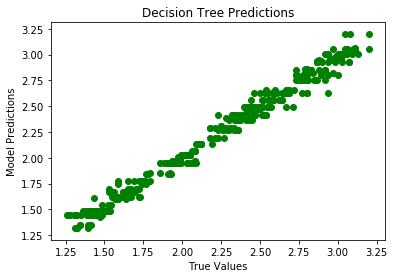

In [50]:
#Visualise the results

plt.scatter(y_test, DT_y_predict, color = 'g')

plt.ylabel('Model Predictions')
plt.xlabel('True Values')
plt.title('Decision Tree Predictions')

### Metrics and Residuals Plot

In [51]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

RMSE = float(format(np.sqrt(mean_squared_error(y_test, DT_y_predict)) , '.3f'))

MAE_DT = sklearn.metrics.mean_absolute_error(y_test , DT_y_predict)

r2_DT = sklearn.metrics.r2_score(y_test , DT_y_predict)

adj_r2_DT = 1-(1-r2_DT)*(n-1)/(n-k-1)  

print('Decision Tree','\nRMSE=', RMSE, '\nMAE_DT =',MAE_DT, '\nR2_DT =', r2_DT, '\nAdjusted R2_DT =', adj_r2_DT) 

Decision Tree 
RMSE= 0.066 
MAE_DT = 0.04917897287606055 
R2_DT = 0.9839282234514454 
Adjusted R2_DT = 0.9834917060637068


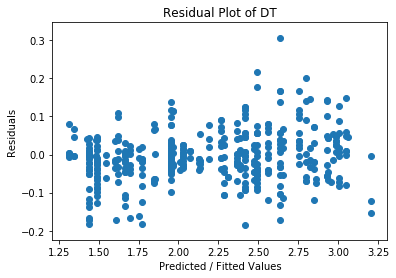

In [52]:
# Lets have a look at the residuals plot

import matplotlib.pyplot as plt
residuals = y_test - DT_y_predict
plt.scatter(DT_y_predict, residuals)

plt.ylabel('Residuals')
plt.xlabel('Predicted / Fitted Values')
plt.title('Residual Plot of DT')
plt.show()

In [53]:
text_representation = tree.export_text(model_DT)
print(text_representation)

|--- feature_3 <= -0.01
|   |--- feature_3 <= -0.92
|   |   |--- feature_0 <= -1.26
|   |   |   |--- feature_4 <= -1.53
|   |   |   |   |--- feature_2 <= -1.61
|   |   |   |   |   |--- feature_0 <= -1.66
|   |   |   |   |   |   |--- value: [1.34]
|   |   |   |   |   |--- feature_0 >  -1.66
|   |   |   |   |   |   |--- value: [1.41]
|   |   |   |   |--- feature_2 >  -1.61
|   |   |   |   |   |--- feature_10 <= -0.29
|   |   |   |   |   |   |--- value: [1.32]
|   |   |   |   |   |--- feature_10 >  -0.29
|   |   |   |   |   |   |--- value: [1.35]
|   |   |   |--- feature_4 >  -1.53
|   |   |   |   |--- feature_9 <= 1.36
|   |   |   |   |   |--- feature_4 <= -1.39
|   |   |   |   |   |   |--- value: [1.44]
|   |   |   |   |   |--- feature_4 >  -1.39
|   |   |   |   |   |   |--- value: [1.49]
|   |   |   |   |--- feature_9 >  1.36
|   |   |   |   |   |--- feature_8 <= -1.55
|   |   |   |   |   |   |--- value: [1.55]
|   |   |   |   |   |--- feature_8 >  -1.55
|   |   |   |   |   |   |--- va

### Predicted Values vs True Values

In [54]:
test= pd.DataFrame(y_test)
predict_dt = pd.DataFrame(DT_y_predict)
print('Real Values DT', test.head(10))

print('Predicted Values DT', predict_dt.head(10))

Real Values DT       Close
1733   2.00
1823   2.10
2294   1.99
1699   2.03
2575   1.76
1751   1.96
766    1.93
2315   1.47
1936   2.36
2217   2.34
Predicted Values DT           0
0  2.026140
1  2.136000
2  2.010000
3  2.026140
4  1.770652
5  1.952249
6  1.952249
7  1.430000
8  2.368421
9  2.414000


# RANDOM FOREST REGRESSION

Random forests -  a way to generate a very large number of trees and taking the avearge of all predictions. 

Randon Forests reduce the variance seen in decision trees by using different samples for training and random feature subsets.

A single decision tree is a weak predictor, but is relatively fast to build. More trees give you a more robust model and prevent overfitting, but the downside is a slower process.


In [55]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(n_estimators = 10, random_state = 134)
model_RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=134, verbose=0, warm_start=False)

In [56]:
RF_y_predict = model_RF.predict(X_test)

Text(0.5, 1.0, 'Random Forest Predictions')

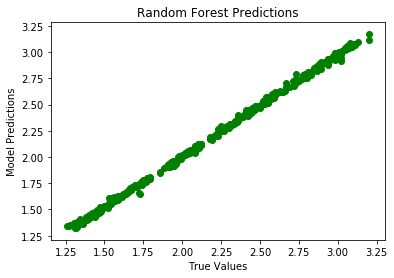

In [57]:
#visualise the results
plt.scatter(y_test, RF_y_predict, color = 'g')

plt.ylabel('Model Predictions')
plt.xlabel('True Values')
plt.title('Random Forest Predictions')

###  Metrics and Residuals Plot

In [58]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

RMSE = float(format(np.sqrt(mean_squared_error(y_test, RF_y_predict)) , '.3f'))

MAE_RF = sklearn.metrics.mean_absolute_error(y_test , RF_y_predict)

r2_RF = sklearn.metrics.r2_score(y_test , RF_y_predict)

adj_r2_RF = 1-(1-r2_RF)*(n-1)/(n-k-1)

print('Random Forest','\nRMSE=', RMSE, '\nMAE_RF =',MAE_RF, '\nR2_RF =', r2_RF, '\nAdjusted R2_RF =', adj_r2_RF) 

Random Forest 
RMSE= 0.025 
MAE_RF = 0.01922901678657075 
R2_RF = 0.9977104303871605 
Adjusted R2_RF = 0.997648244545824


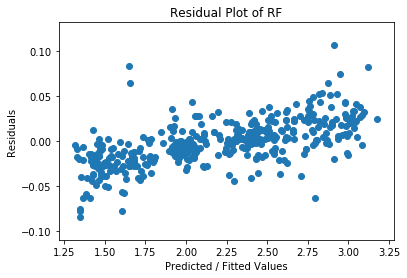

In [59]:
# Lets have a look at the residuals plot

import matplotlib.pyplot as plt
residuals = y_test - RF_y_predict
plt.scatter(RF_y_predict, residuals)

plt.ylabel('Residuals')
plt.xlabel('Predicted / Fitted Values')
plt.title('Residual Plot of RF')
plt.show()

The Random Forest model has a better residuals plot clustered near zero and a better fit (smaller error term, higher R2) than compared to the Decision Tree Regressor

### Predicted Values vs True Values

In [60]:
test= pd.DataFrame(y_test)
predict_rf = pd.DataFrame(RF_y_predict)
print('Real Values RF', test.head(10))

print('Predicted Values RF', predict_rf.head(10))

Real Values RF       Close
1733   2.00
1823   2.10
2294   1.99
1699   2.03
2575   1.76
1751   1.96
766    1.93
2315   1.47
1936   2.36
2217   2.34
Predicted Values RF         0
0  2.0120
1  2.1270
2  1.9785
3  2.0480
4  1.7760
5  1.9650
6  1.9525
7  1.5210
8  2.3750
9  2.3260


# Support Vector Regression

SVR gives us the flexibility to define how much error is acceptable in our model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data.

Objective is to find a line( or hyperplane ) which maximizes the separation between data of different classes
The distance between the line and the closest data points is referred to as the margin.

Cases where a support vector regression is advantageous over other regression algorithms:

SVM is memory efficient, which means it takes a relatively lower amount of calculation resources to train the model. This is because presenting the solution by means of a small subset of training points gives enormous computational advantages.

There are non-linear or complex relationships between features and labels. This is because we have the option to convert non-linear relationships to higher-dimensional problems in the case of support vector regression.

In [61]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train, y_train)

svr_y_predict = svr.predict(X_test)


In [62]:
svr.support_vectors_

array([[-1.36965315e+00, -1.44123413e+00, -1.52452947e+00,
        -1.35970710e+00, -1.43556722e+00, -1.51252340e+00,
         9.68617585e-01, -6.13609945e-01, -1.74759286e+00,
         1.67074879e+00,  9.24647418e-01],
       [-1.20545313e+00, -1.26680135e+00, -8.91229117e-01,
        -1.18390092e+00, -1.15813464e+00, -9.05787078e-01,
        -8.23672201e-01,  5.52355933e-01,  1.70517719e+00,
         5.14758830e-01,  1.12688831e+00],
       [-1.66748142e+00, -1.63967869e+00, -1.57363029e+00,
        -1.66956883e+00, -1.64604773e+00, -1.59672612e+00,
        -6.54144691e-01, -1.15963650e+00, -1.16285922e+00,
         9.86731836e-02,  1.64615545e+00],
       [-1.06442849e+00, -1.02192075e+00, -1.21970357e+00,
        -1.09767506e+00, -1.09910674e+00, -1.17597083e+00,
        -2.89005267e-01,  1.80691881e-01, -8.26501900e-01,
        -1.05858096e+00, -9.90123900e-01],
       [-1.47468199e+00, -1.32950983e+00, -1.29786406e+00,
        -1.49706808e+00, -1.37652668e+00, -1.16983803e+00,
  

Text(0.5, 1.0, 'SVR Predictions')

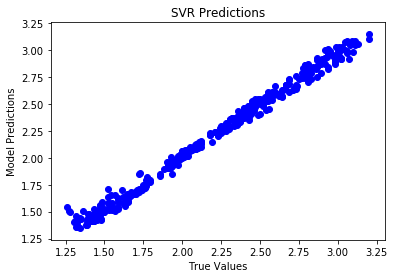

In [63]:
# Visualise the model
plt.scatter(y_test,svr_y_predict, color = 'b')

plt.ylabel('Model Predictions')
plt.xlabel('True Values')
plt.title('SVR Predictions')

### Metrics and Residuals Plot

In [64]:
#Evaluate the model

RMSE = float(format(np.sqrt(mean_squared_error(y_test, svr_y_predict)) , '.3f'))

MAE_svr = sklearn.metrics.mean_absolute_error(y_test, svr_y_predict)

r2_svr = sklearn.metrics.r2_score(y_test , svr_y_predict)

adj_r2_svr = 1-(1-r2_svr)*(n-1)/(n-k-1)

print('Support Vector','\nRMSE_svr=', RMSE, '\nMAE_svr =',MAE_svr, '\nR2_svr =', r2_svr, '\nAdjusted R2_svr =', adj_r2_svr) 

Support Vector 
RMSE_svr= 0.051 
MAE_svr = 0.03723030179586272 
R2_svr = 0.9903720033709487 
Adjusted R2_svr = 0.9901105022279374


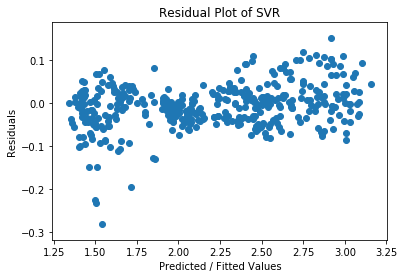

In [65]:
# Lets have a look at the residuals plot

import matplotlib.pyplot as plt
residuals = y_test - svr_y_predict
plt.scatter(svr_y_predict, residuals)

plt.ylabel('Residuals')
plt.xlabel('Predicted / Fitted Values')
plt.title('Residual Plot of SVR')
plt.show()

### Predicted Values vs True Values

In [66]:
test= pd.DataFrame(y_test)

predict_svr = pd.DataFrame(svr_y_predict)

print('Real Values SVR', test.head(10))

print('Predicted SVR', predict_svr.head(10))

Real Values SVR       Close
1733   2.00
1823   2.10
2294   1.99
1699   2.03
2575   1.76
1751   1.96
766    1.93
2315   1.47
1936   2.36
2217   2.34
Predicted SVR           0
0  2.041790
1  2.095503
2  2.031354
3  2.073884
4  1.720021
5  1.977259
6  1.915287
7  1.558809
8  2.328359
9  2.374549


# XG BOOST REGRESSION

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework

Like random forests, gradient boosting is a set of decision trees. The two main differences are:

How trees are built: random forests builds each tree independently while gradient boosting builds one tree at a time. This additive model (ensemble) works in a forward stage-wise manner, introducing a weak learner to improve the shortcomings of existing weak learners. 

Combining results: random forests combine results at the end of the process (by averaging or "majority rules") while gradient boosting combines results along the way.


In [67]:
import xgboost as xgb
model_xgb = xgb.sklearn.XGBRegressor()
model_xgb.fit(X_train , y_train)

[10:12:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [68]:
xgb_y_predict = model_xgb.predict(X_test)

Text(0.5, 1.0, 'XGB Predictions')

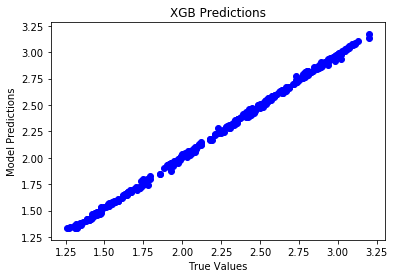

In [69]:
# Visualise the model
plt.scatter(y_test,xgb_y_predict, color = 'b')

plt.ylabel('Model Predictions')
plt.xlabel('True Values')
plt.title('XGB Predictions')

### Metrics and Residuals Plot

In [70]:
#Evaluate the model

RMSE = float(format(np.sqrt(mean_squared_error(y_test, xgb_y_predict)) , '.3f'))

MAE_xgb = sklearn.metrics.mean_absolute_error(y_test, xgb_y_predict)

r2_xgb = sklearn.metrics.r2_score(y_test , xgb_y_predict)

adj_r2_xgb = 1-(1-r2_xgb)*(n-1)/(n-k-1)

print('XGB','\nRMSE_xgb=', RMSE, '\nMAE_xgb =',MAE_xgb, '\nR2_xgb =', r2_xgb, '\nAdjusted R2_xgb =', adj_r2_xgb) 

XGB 
RMSE_xgb= 0.022 
MAE_xgb = 0.017857804206921325 
R2_xgb = 0.9982330160330115 
Adjusted R2_xgb = 0.9981850238758835


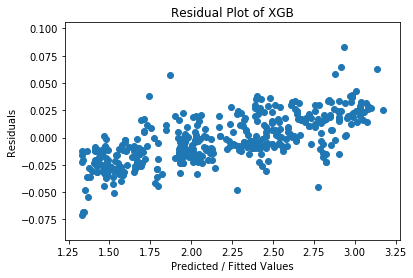

In [71]:
# Lets have a look at the residuals plot

import matplotlib.pyplot as plt
residuals = y_test - xgb_y_predict
plt.scatter(xgb_y_predict, residuals)

plt.ylabel('Residuals')
plt.xlabel('Predicted / Fitted Values')
plt.title('Residual Plot of XGB')
plt.show()

In [72]:
#feature_columns = ['SMA20', 'SMA50', 'SMA100', 'EMA20','EMA50', 'EMA100', 
#'ADX','SD', 'ATR', 'RSI','WILLR']

print(model_xgb.feature_importances_)


[0.00709805 0.01085571 0.0010369  0.95096487 0.00738033 0.00098939
 0.0038385  0.00095961 0.00132805 0.01007976 0.00546875]


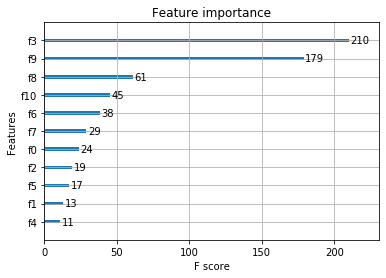

In [73]:
%matplotlib inline

xgb.plot_importance(model_xgb)

Feature 3 SMA100 and Feature 9 ATR seems to be the top 2 important features using XGBoost

### Predicted Values vs Real Values

In [74]:
test= pd.DataFrame(y_test)

predict_xgb = pd.DataFrame(xgb_y_predict)

print('Real Values XGB', test.head(10))

print('Predicted XGB', predict_xgb.head(10))

Real Values XGB       Close
1733   2.00
1823   2.10
2294   1.99
1699   2.03
2575   1.76
1751   1.96
766    1.93
2315   1.47
1936   2.36
2217   2.34
Predicted XGB           0
0  2.018929
1  2.113695
2  2.012588
3  2.045857
4  1.789097
5  1.973575
6  1.941767
7  1.468586
8  2.363094
9  2.324217


# K-Folds Cross Validation 

In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave thefold as validation. We then average the performance each of the folds.

Lets start with validation for models

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# prepare configuration for cross validation test
seed = 100
# prepare models
models = []
models.append(('LR', model_LR))
models.append(('DT', model_DT))
models.append(('RF', model_RF))
models.append(('SVC', svr))
models.append(('XGB', model_xgb))

# evaluate each model in turn
results = []
names = []
scoring = 'r2'
for name, model in models:
    kf = KFold(n_splits=7, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring = scoring) 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg); print()


LR: 0.998221 (0.000171)

DT: 0.986479 (0.002604)

RF: 0.998384 (0.000321)

SVC: 0.990561 (0.001780)

[10:12:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:12:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:12:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:12:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:12:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:12:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:12:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB: 0.998613 (0.000200)



In [76]:
print(names)
print (results)

['LR', 'DT', 'RF', 'SVC', 'XGB']
[array([0.99823857, 0.99829669, 0.99807409, 0.99803735, 0.99857245,
       0.99824592, 0.99807964]), array([0.9821713 , 0.98930648, 0.98599139, 0.98447981, 0.98504156,
       0.98912577, 0.98923783]), array([0.99879055, 0.99830853, 0.99780042, 0.9980771 , 0.99861833,
       0.99861715, 0.99847426]), array([0.99220226, 0.99048833, 0.99115764, 0.98649289, 0.99111912,
       0.99205767, 0.99040914]), array([0.99871061, 0.99873313, 0.99820929, 0.99853582, 0.99862938,
       0.99890342, 0.9985705 ])]


# HYPER PARAMETER TUNING FOR OUR MODELS

Model parameters: estimated by the model from the given data. 

Model hyperparameters: parameters that cannot be estimated by the model from the given data. These parameters are used to estimate the model parameters. 

There are a few methods to consider:

Grid search - we  build a model for each possible combination of all of the hyperparameter values provided, evaluating each model, and selecting the architecture which produces the best results.

Random search-  we provide a statistical distribution for each hyperparameter from which values may be randomly sampled.We Can also define how many iterations  to build when searching for the optimal model using scipy. 

Bayesian Optimization -optimise the process of minimising the loss function of our model by changing model parameters

We will use Grid Search in our analysis as it is the most basic hyperparameter tuning method.

### RANDOM FOREST HYPER PARAMETER TUNING

Random forests are an ensemble model comprised of a collection of decision trees- when building such a model, two important hyperparameters to consider are:

How many estimators (ie. decision trees) should I use?

What should be the maximum allowable depth for each decision tree?


In [77]:
from sklearn.model_selection import GridSearchCV

base_model_RF = RandomForestRegressor(random_state = 134)
param_dict_RF = {'n_estimators' : [10  , 20 , 50 , 100] , 
                 'max_depth' : [5 ,6 ,7 , 9 , 10]}
grid_model_RF = GridSearchCV(param_grid= param_dict_RF , 
                             estimator= base_model_RF , cv= 5 , verbose=1)
grid_model_RF.fit(X_train, y_train)
grid_model_RF.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   23.6s finished


{'max_depth': 10, 'n_estimators': 100}

#####  Building the Random Forest model based on best param from Grid Search

In [78]:
best_RF = RandomForestRegressor(max_depth = 10, n_estimators = 100, random_state = 134)

In [79]:
bestmodel_RF = best_RF.fit(X_train, y_train)
result_RF = bestmodel_RF.predict(X_test)

### Metrics

In [80]:
RMSE_bestmodel_RF = float(format(np.sqrt(mean_squared_error(y_test, result_RF)) , '.3f'))

MAE_bestmodel_RF = sklearn.metrics.mean_absolute_error(y_test , result_RF)

r2_bestmodel_RF = sklearn.metrics.r2_score(y_test , result_RF)

adj_r2_bestmodel_RF = 1-(1-r2_bestmodel_RF)*(n-1)/(n-k-1)

print('Random Forest Hyperparameter Tuning','\nRMSE_bestRF=', RMSE_bestmodel_RF, '\nMAE_bestRF =',MAE_bestmodel_RF, '\nR2_bestRF =', r2_bestmodel_RF, '\nAdjusted R2_bestRF =', adj_r2_bestmodel_RF) 

Random Forest Hyperparameter Tuning 
RMSE_bestRF= 0.023 
MAE_bestRF = 0.017273700285575684 
R2_bestRF = 0.9980274579286725 
Adjusted R2_bestRF = 0.9979738827119204


In [81]:
len(bestmodel_RF.feature_importances_)

11

In [82]:
bestmodel_RF.feature_importances_

array([7.98558245e-03, 4.18195961e-04, 3.90357902e-04, 9.75826439e-01,
       4.30529032e-04, 4.97628021e-04, 5.90618201e-04, 8.89836036e-04,
       1.11193839e-03, 1.00517717e-02, 1.80710299e-03])

In [83]:
test= pd.DataFrame(y_test)

predict_bestrf = pd.DataFrame(result_RF)

print('Real Values RF Best', test.head(10))

print('Predicted RF Best', predict_bestrf.head(10))

Real Values RF Best       Close
1733   2.00
1823   2.10
2294   1.99
1699   2.03
2575   1.76
1751   1.96
766    1.93
2315   1.47
1936   2.36
2217   2.34
Predicted RF Best           0
0  2.005815
1  2.109054
2  1.993622
3  2.036060
4  1.777509
5  1.962746
6  1.941776
7  1.516695
8  2.361971
9  2.322281


### DECISION TREE HYPER PARAMETER TUNING

In [84]:
from sklearn.model_selection import GridSearchCV

model_DT = DecisionTreeRegressor()

grid_model_DT = GridSearchCV(model_DT,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

grid_model_DT.fit(X_train, y_train)

print(grid_model_DT.best_params_)
print(-grid_model_DT.best_score_)

{'max_depth': 9, 'min_samples_split': 10}
0.0009265205441925302


In [85]:
#optimised model for decision tree

best_DT = DecisionTreeRegressor(max_depth=10,
                                  min_samples_split=10)
#or best_DT = grid_model_DT.best_estimator_
bestmodel_DT = best_DT.fit(X_train, y_train)

result_DT = bestmodel_DT.predict(X_test)

In [86]:
bestmodel_DT.feature_importances_

array([1.38581031e-02, 2.06555920e-04, 2.87922286e-04, 9.68885045e-01,
       2.36252740e-04, 3.27510839e-04, 2.11301152e-03, 2.81614855e-04,
       6.08804982e-04, 1.20236350e-02, 1.17154337e-03])

### Metrics

In [87]:
RMSE_bestmodel_DT = float(format(np.sqrt(mean_squared_error(y_test, result_DT)) , '.3f'))

MAE_bestmodel_DT = sklearn.metrics.mean_absolute_error(y_test , result_DT)

r2_bestmodel_DT = sklearn.metrics.r2_score(y_test , result_DT)

adj_r2_bestmodel_DT = 1-(1-r2_bestmodel_DT)*(n-1)/(n-k-1)

print('Decision Tree Hyperparameter Tuning','\nRMSE_bestDT=', RMSE_bestmodel_DT, '\nMAE_bestDT =',MAE_bestmodel_DT, '\nR2_bestDT =', r2_bestmodel_DT, '\nAdjusted R2_bestDT =', adj_r2_bestmodel_DT) 

Decision Tree Hyperparameter Tuning 
RMSE_bestDT= 0.035 
MAE_bestDT = 0.0255193546461532 
R2_bestDT = 0.9954406525225 
Adjusted R2_bestDT = 0.9953168183934815


In [88]:
test= pd.DataFrame(y_test)

predict_bestdt = pd.DataFrame(result_DT)

print('Real Values DT Best', test.head(10))

print('Predicted DT Best', predict_bestdt.head(10))

Real Values DT Best       Close
1733   2.00
1823   2.10
2294   1.99
1699   2.03
2575   1.76
1751   1.96
766    1.93
2315   1.47
1936   2.36
2217   2.34
Predicted DT Best           0
0  2.008889
1  2.097143
2  1.999286
3  2.018333
4  1.778750
5  1.953889
6  1.924167
7  1.494000
8  2.344000
9  2.298750


### XG BOOST MODEL HYPER PARAMETER TUNING

In [89]:
param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

model_xgb = xgb.sklearn.XGBRegressor()
    
grid = GridSearchCV(estimator = model_xgb,
                           param_grid = param_tuning,                        
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

grid.fit(X_train,y_train)

print(grid.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  2.4min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.5}


In [90]:
best_xgb = xgb.sklearn.XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.1,
        max_depth = 7,
        min_child_weight = 3,
        n_estimators = 500,
        subsample = 0.5)

bestmodel_xgb = best_xgb.fit(X_train, y_train)

result_xgb = bestmodel_xgb.predict(X_test)

### Metrics

In [91]:
RMSE_bestmodel_xgb = float(format(np.sqrt(mean_squared_error(y_test, result_xgb)) , '.3f'))

MAE_bestmodel_xgb = sklearn.metrics.mean_absolute_error(y_test , result_xgb)

r2_bestmodel_xgb = sklearn.metrics.r2_score(y_test , result_xgb)

adj_r2_bestmodel_xgb = 1-(1-r2_bestmodel_xgb)*(n-1)/(n-k-1)

print('XGB Hyperparameter Tuning','\nRMSE_bestxgb=', RMSE_bestmodel_xgb, '\nMAE_bestxgb =',MAE_bestmodel_xgb, '\nR2_bestxgb =', r2_bestmodel_xgb, '\nAdjusted R2_bestxgb =', adj_r2_bestmodel_xgb) 

XGB Hyperparameter Tuning 
RMSE_bestxgb= 0.021 
MAE_bestxgb = 0.016554884967758216 
R2_bestxgb = 0.9983535817254894 
Adjusted R2_bestxgb = 0.9983088641921076


In [92]:
test= pd.DataFrame(y_test)

predict_bestxgb = pd.DataFrame(result_xgb)

print('Real Values XGB Best', test.head(10))

print('Predicted XGB Best', predict_bestxgb.head(10))

Real Values XGB Best       Close
1733   2.00
1823   2.10
2294   1.99
1699   2.03
2575   1.76
1751   1.96
766    1.93
2315   1.47
1936   2.36
2217   2.34
Predicted XGB Best           0
0  2.009860
1  2.124099
2  1.990586
3  2.021455
4  1.759557
5  1.968793
6  1.952198
7  1.409633
8  2.368566
9  2.330620


### SUPPORT VECTOR MODEL HYPER PARAMETER TUNING

In [98]:
#from sklearn.model_selection import GridSearchCV
#param_grid = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
#grid = GridSearchCV(svr,param_grid)
#grid.fit(X_train,y_train)


# First try of this code yielded kernel='rbf', C=1000, gamma=0.001, degree=3. Subsequently, I reran the notebook but
# it stalled the whole notebook for an hour. So I just took the parameters as above. 

In [99]:
#optimised model for SVR

best_svr = SVR(kernel='rbf', C=1000, gamma=0.001, degree=3)

bestmodel_svr = best_svr.fit(X_train, y_train)

result_svr = bestmodel_svr.predict(X_test)

In [102]:
RMSE_bestmodel_svr = float(format(np.sqrt(mean_squared_error(y_test, result_svr)) , '.3f'))

MAE_bestmodel_svr = sklearn.metrics.mean_absolute_error(y_test , result_svr)

r2_bestmodel_svr = sklearn.metrics.r2_score(y_test , result_svr)

adj_r2_bestmodel_svr = 1-(1-r2_bestmodel_svr)*(n-1)/(n-k-1)

print('SVR Hyperparameter Tuning','\nRMSE_bestsvr=', RMSE_bestmodel_svr, '\nMAE_bestsvr =',MAE_bestmodel_svr, '\nR2_bestsvr =', r2_bestmodel_svr, '\nAdjusted R2_bestsvr =', adj_r2_bestmodel_svr) 

SVR Hyperparameter Tuning 
RMSE_bestsvr= 0.042 
MAE_bestsvr = 0.03389499037966198 
R2_bestsvr = 0.9936814708264377 
Adjusted R2_bestsvr = 0.9935098564538224


In [104]:
test= pd.DataFrame(y_test)

predict = pd.DataFrame(result_svr)

print('Real Values SVR Best', test.head(10))

print('Predicted SVR Best', predict.head(10))

Real Values SVR Best       Close
1733   2.00
1823   2.10
2294   1.99
1699   2.03
2575   1.76
1751   1.96
766    1.93
2315   1.47
1936   2.36
2217   2.34
Predicted SVR Best           0
0  2.054088
1  2.158223
2  1.931336
3  2.085855
4  1.757269
5  2.018227
6  1.907268
7  1.559138
8  2.413246
9  2.346753
